In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model2, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for EC-Earth3: ['/home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_north-atlantic_2-9_DJFM-r1i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_north-atlantic_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_north-atlantic_2-9_DJFM-r9i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_north-atlantic_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_north-atlantic_2-9_DJFM-r9i2.nc', 

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[  68.14844     71.67969     76.71875   ...   71.41406     69.015625
     65.67969  ]
  [  69.96094     79.02344     86.16406   ...   71.890625    67.75
     69.38281  ]
  [  80.14844     90.13281     97.14844   ...   70.703125    69.3125
     66.57031  ]
  ...
  [  -7.453125    -7.8125      -1.3828125 ...  168.38281    177.09375
    185.97656  ]
  [  -7.171875    -0.5859375    2.875     ...  129.29688    138.28906
    145.44531  ]
  [ -33.15625    -36.492188   -30.96875   ...   32.390625    41.492188
     50.265625 ]]

 [[ -47.828125   -48.976562   -55.304688  ...  -59.390625   -51.492188
    -43.96875  ]
  [ -56.546875   -63.101562   -66.453125  ...  -60.976562   -51.21875
    -45.117188 ]
  [ -70.21094    -78.234375   -81.10156   ...  -60.054688   -49.523438
    -42.101562 ]
  ...
  [  39.484375    41.265625    43.460938  ...   23.421875    39.851562
     55.976562 ]
  [  44.664062    44.054688    44.554688  ...   97.67969    104

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Region grid dimensions: {'lon1': 280, 'lon2': 37.5, 'lat1': 77.5, 'lat2': 20}


/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Forecast range: 2 - 9
Rolling mean range: 8
Processed observations dataset: Frozen({'time': 63, 'lon': 48, 'lat': 24})


In [8]:
# # check the values of obs
# obs["var151"].values

In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

In [10]:
# # Attempt to plot the data
# fnc.plot_obs_data(obs)

In [11]:
# print(variable_data["CMCC-CM2-SR5"])

In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
print((variable_data['EC-Earth3']))

[<xarray.DataArray 'psl' (time: 59, lat: 24, lon: 48)>
dask.array<open_dataset-57df4459a8d0d1bcde35a6087c8e67fapsl, shape=(59, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1965-08-01 1966-08-01 ... 2023-08-01
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    comment:        Sea Level Pressure
    cell_measures:  area: areacella
    history:        2019-03-20T07:54:30Z altered by CMOR: Reordered dimension..., <xarray.DataArray 'psl' (time: 59, lat: 24, lon: 48)>
dask.array<open_dataset-2df110504dada48d8f75e038fd11c471psl, shape=(59, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) da

In [14]:
print(type(obs))

<class 'xarray.core.dataset.Dataset'>


In [15]:
print(type(dic.test_model2))

<class 'list'>


In [16]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model2)

Common years: [1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Common years type: <class 'list'>
Common years shape: (58,)
model years [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]
model years shape (59,)
years in both shape (58,)
years in both [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 20

pfield mod [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan 0.0097941  ...        nan        nan        nan]
 [       nan 0.00721491 0.0060139  ... 0.00963619        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


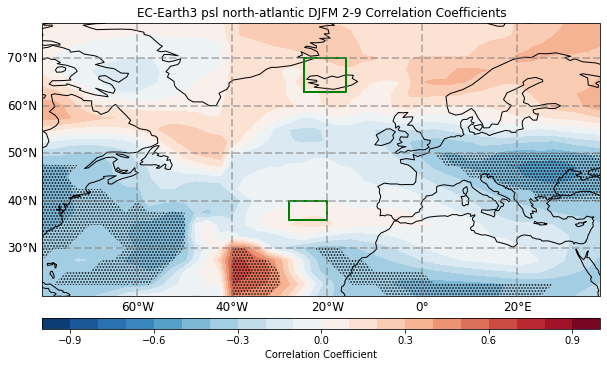

In [17]:
# Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.test_model2, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)